<a href="https://colab.research.google.com/github/Abjit0/CourseWork/blob/main/Abjit_Maharjan_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/coursework

Mounted at /content/drive
/content/drive/MyDrive/coursework


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('World_Happiness_Report.csv')

In [ ]:
# 1. Data Exploration and Understanding
## Dataset Overview
# 1. Display the first 10 rows
print("First 10 rows of the dataset:")
print(data.head(10))

# 2. Identify the number of rows and columns
print("\nNumber of rows and columns:")
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

# 3. List all columns and their data types
print("\nColumns and their data types:")
print(data.dtypes)

First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

In [ ]:
## Basic Statistics
# 1. Calculate the mean, median, and standard deviation for the Score column
print("\nStatistics for the 'score' column:")
mean_score = data['score'].mean()
median_score = data['score'].median()
std_score = data['score'].std()
print(f"Mean: {mean_score}, Median: {median_score}, Standard Deviation: {std_score}")



Statistics for the 'score' column:
Mean: 5.52758041958042, Median: 5.785, Standard Deviation: 1.1707165099442995


In [ ]:
# 2. Identify the country with the highest and lowest happiness scores
highest_happiness = data.loc[data['score'].idxmax()]
lowest_happiness = data.loc[data['score'].idxmin()]
print("\nCountry with the highest happiness score:")
print(highest_happiness[['Country name', 'score']])
print("\nCountry with the lowest happiness score:")
print(lowest_happiness[['Country name', 'score']])



Country with the highest happiness score:
Country name    Finland
score             7.741
Name: 0, dtype: object

Country with the lowest happiness score:
Country name    Afghanistan
score                 1.721
Name: 142, dtype: object


In [ ]:

## Missing Values
# 1. Check if there are any missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
## Filtering and Sorting
# 1. Filter the dataset to show only the countries with a Score greater than 7.5
filtered_data = data[data['score'] > 7.5]
print("\nCountries with a Score greater than 7.5:")
print(filtered_data)


Countries with a Score greater than 7.5:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [ ]:
# 2. Sort the filtered dataset by GDP per Capita in descending order and display the top 10 rows
top_10_gdp = filtered_data.sort_values(by='Log GDP per capita', ascending=False).head(10)
print("\nTop 10 countries by GDP per Capita (Score > 7.5):")
print(top_10_gdp)


Top 10 countries by GDP per Capita (Score > 7.5):
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [ ]:
## Adding New Columns
# 1. Create a new column 'Happiness Category'
def happiness_category(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

data['Happiness Category'] = data['score'].apply(happiness_category)
print("\nDataset with 'Happiness Category':")
print(data[['Country name', 'score', 'Happiness Category']])


Dataset with 'Happiness Category':
         Country name  score Happiness Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


<ipython-input-12-19a59b6eeb1d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=top_10_happy, palette='viridis')


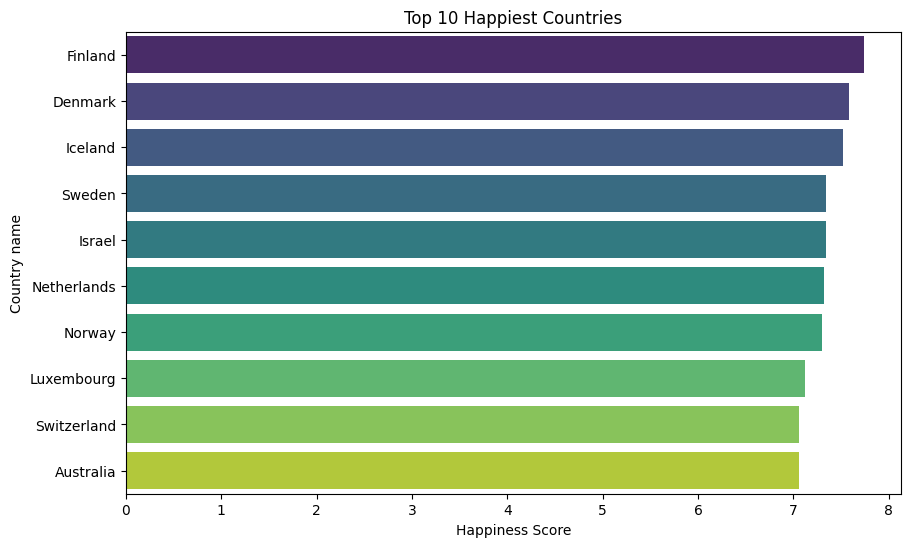

In [ ]:

## Data Visualizations
# Bar Plot: Top 10 happiest countries by Score
top_10_happy = data.sort_values(by='score', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happy, palette='viridis')
plt.title('Top 10 Happiest Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country name')
plt.show()

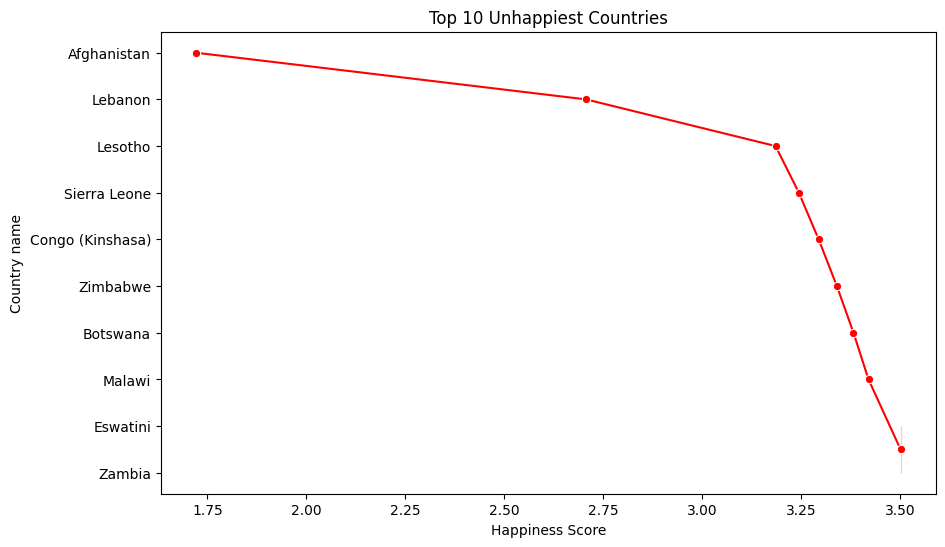

In [ ]:

# Line Plot: Top 10 unhappiest countries by Score
top_10_unhappy = data.sort_values(by='score', ascending=True).head(10)
plt.figure(figsize=(10, 6))
sns.lineplot(x='score', y='Country name', data=top_10_unhappy, marker='o', color='red')
plt.title('Top 10 Unhappiest Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country name')
plt.show()

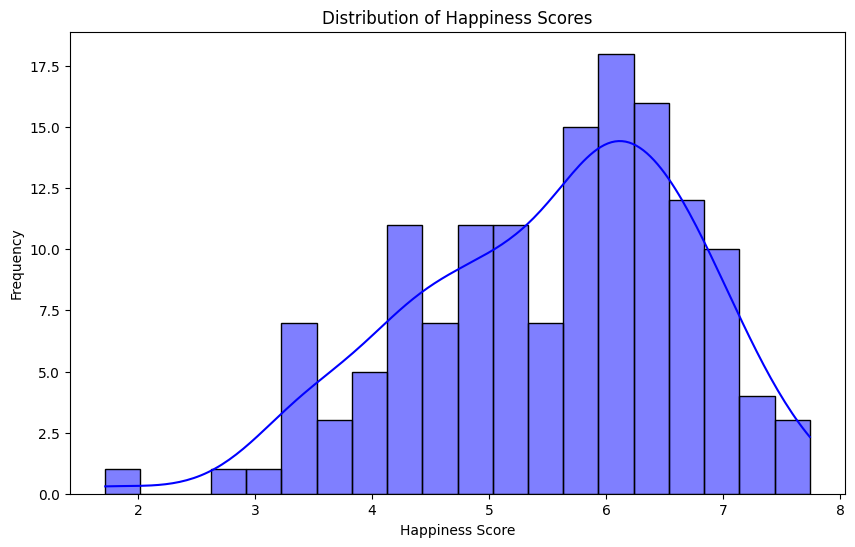

In [ ]:

# Histogram: Score column
plt.figure(figsize=(10, 6))
sns.histplot(data['score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

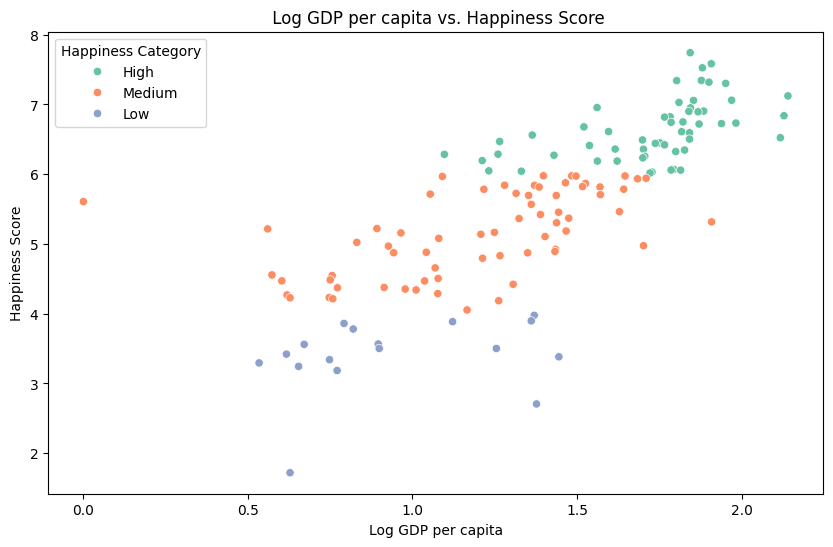

In [ ]:
# Scatter Plot: GDP per Capita vs. Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=data, hue='Happiness Category', palette='Set2')
plt.title(' Log GDP per capita vs. Happiness Score')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.show()

**3.2 Problem - 2 - Some Advance Data Exploration Task:**

In [ ]:
# Task 1: Setup Task - Preparing the South-Asia Dataset
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Filter the dataset for South Asian countries
south_asia_data = data[data['Country name'].isin(south_asian_countries)]
print("Filtered South Asia Dataset:")
print(south_asia_data)

# Save the filtered DataFrame to a new CSV file
south_asia_data.to_csv('South_Asia_Happiness.csv', index=False)

Filtered South Asia Dataset:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perce


South Asian Countries Ranked by Composite Score:
    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


<ipython-input-40-2871aa1ee4dd>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Composite Score', y='Country name', data=top_5_composite, palette='coolwarm')


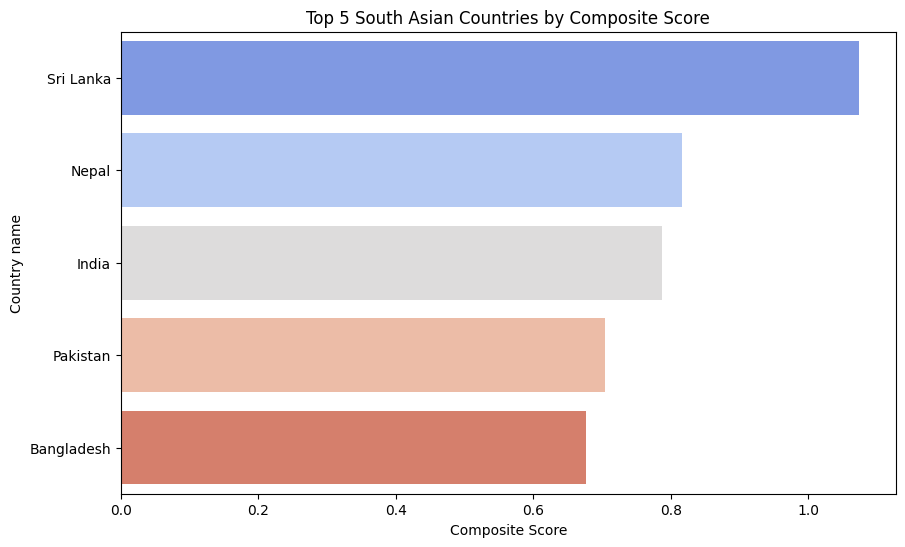

In [ ]:
# Task 2: Composite Score Ranking
# Create a new column 'Composite Score'
south_asia_data['Composite Score'] = (
    0.40 * south_asia_data['Log GDP per capita'] +
    0.30 * south_asia_data['Social support'] +
    0.30 * south_asia_data['Healthy life expectancy']
)

# Rank the countries based on Composite Score
south_asia_data = south_asia_data.sort_values(by='Composite Score', ascending=False)
print("\nSouth Asian Countries Ranked by Composite Score:")
print(south_asia_data[['Country name', 'Composite Score']])

# Visualize the top 5 countries using a horizontal bar chart
top_5_composite = south_asia_data.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_composite, palette='coolwarm')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country name')
plt.show()


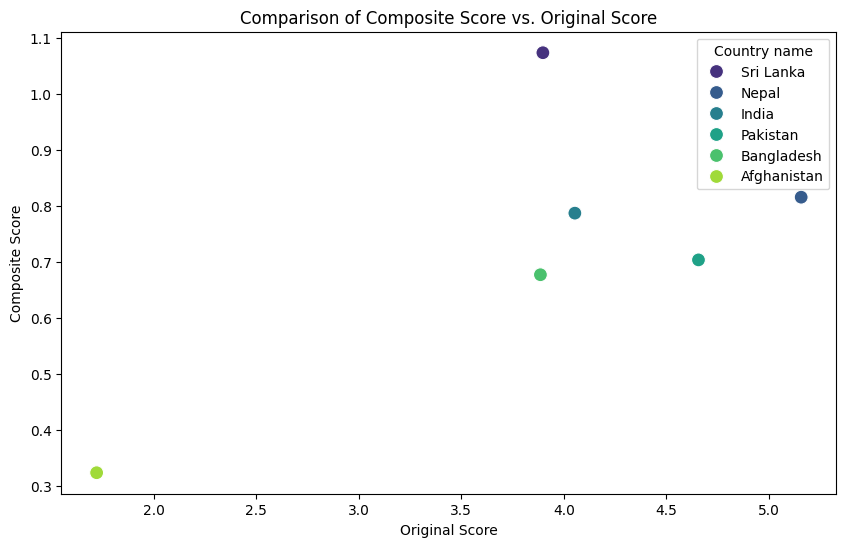

In [ ]:

# Compare rankings based on Composite Score and original Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score', y='Composite Score', data=south_asia_data, hue='Country name', palette='viridis', s=100)
plt.title('Comparison of Composite Score vs. Original Score')
plt.xlabel('Original Score')
plt.ylabel('Composite Score')
plt.show()

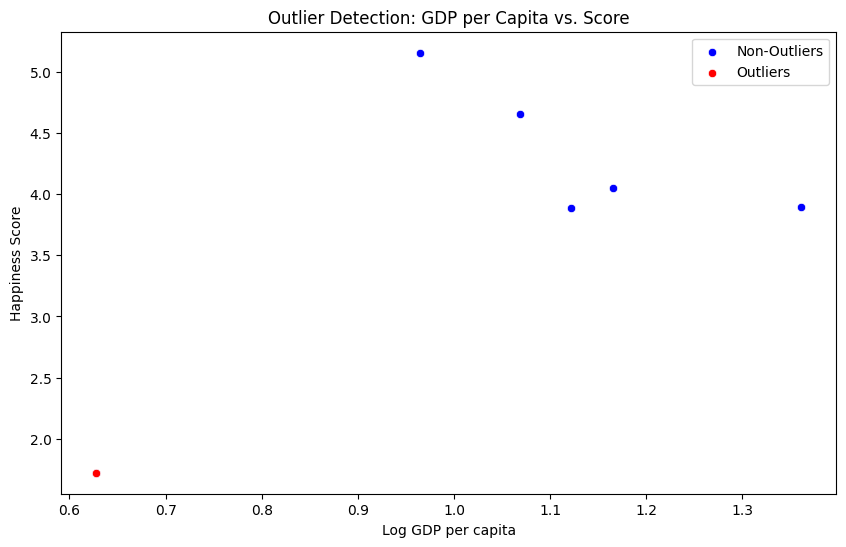

In [ ]:

# Task 3: Outlier Detection
# Define outliers using the 1.5 × IQR rule
Q1_score = south_asia_data['score'].quantile(0.25)
Q3_score = south_asia_data['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = south_asia_data['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asia_data['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

outliers = south_asia_data[
    (south_asia_data['score'] < Q1_score - 1.5 * IQR_score) | (south_asia_data['score'] > Q3_score + 1.5 * IQR_score) |
    (south_asia_data['Log GDP per capita'] < Q1_gdp - 1.5 * IQR_gdp) | (south_asia_data['Log GDP per capita'] > Q3_gdp + 1.5 * IQR_gdp)
]

# Scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, color='blue', label='Non-Outliers')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='red', label='Outliers')
plt.title('Outlier Detection: GDP per Capita vs. Score')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()




Correlations with Happiness Score:
{'Freedom to make life choices': 0.8005185224163315, 'Generosity': 0.874512371253192}


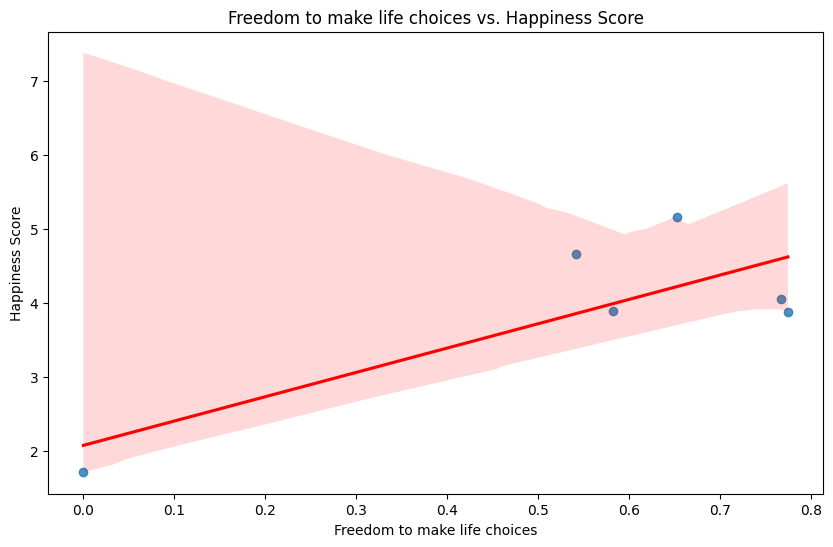

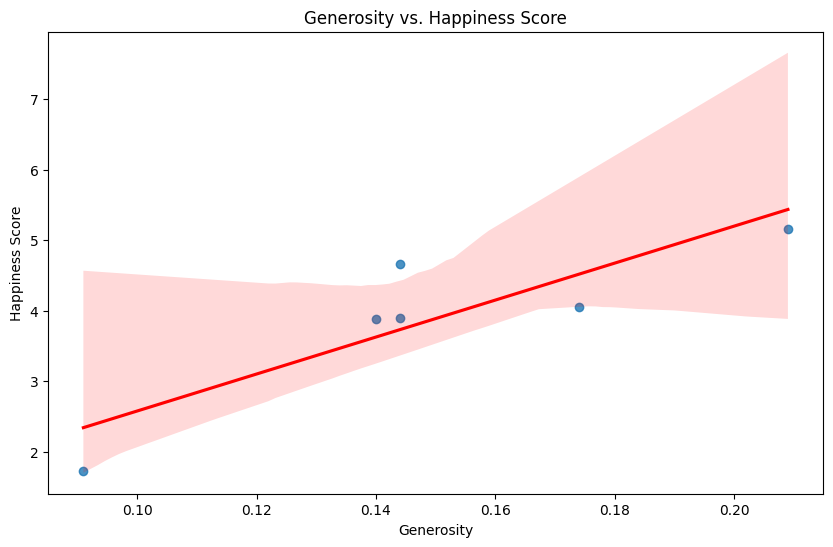

In [ ]:
# Task 4: Exploring Trends Across Metrics
# Calculate correlations
metrics = ['Freedom to make life choices', 'Generosity']
correlations = {metric: south_asia_data[metric].corr(south_asia_data['score']) for metric in metrics}
print("\nCorrelations with Happiness Score:")
print(correlations)

# Scatter plots with trendlines
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=metric, y='score', data=south_asia_data, line_kws={"color": "red"})
    plt.title(f'{metric} vs. Happiness Score')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.show()


<ipython-input-32-587fdaeeba48>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GDP-Score Gap', y='Country name', data=pd.concat([ascending_gap, descending_gap]), palette='plasma')


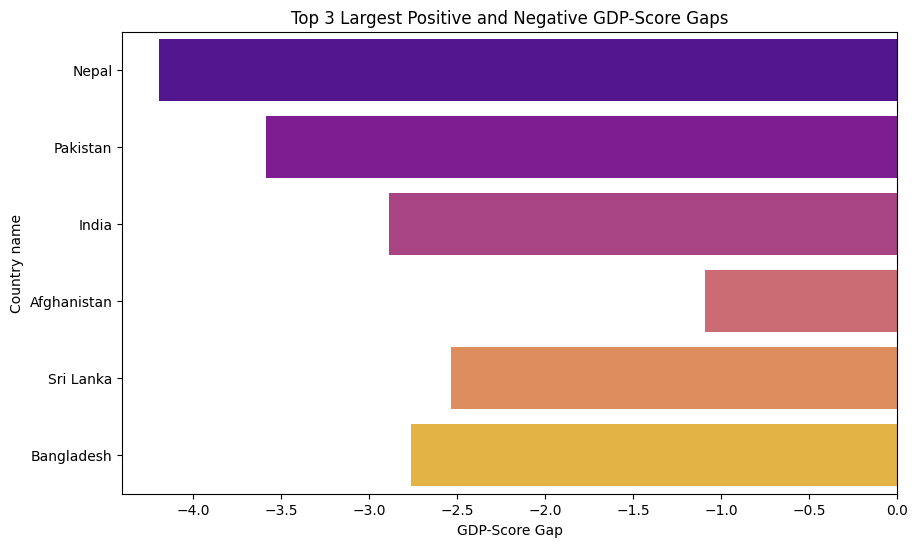

In [ ]:
# Task 5: Gap Analysis
# Create a new column for GDP-Score Gap
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']

# Rank countries by GDP-Score Gap
ascending_gap = south_asia_data.sort_values(by='GDP-Score Gap', ascending=True).head(3)
descending_gap = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False).head(3)

# Bar chart for GDP-Score Gap
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=pd.concat([ascending_gap, descending_gap]), palette='plasma')
plt.title('Top 3 Largest Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country name')
plt.show()

**3.3 Problem - 3 - Comparative Analysis:**

In [ ]:

# Middle Eastern countries list
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter the dataset for Middle Eastern countries
middle_east_data = data[data['Country name'].isin(middle_east_countries)]
print("Filtered Middle East Dataset:")
print(middle_east_data)

# Task 1: Descriptive Statistics
# Calculate mean and standard deviation for South Asia and Middle East
mean_south_asia = south_asia_data['score'].mean()
std_south_asia = south_asia_data['score'].std()

mean_middle_east = middle_east_data['score'].mean()
std_middle_east = middle_east_data['score'].std()

print("\nDescriptive Statistics:")
print(f"South Asia - Mean: {mean_south_asia}, Std Dev: {std_south_asia}")
print(f"Middle East - Mean: {mean_middle_east}, Std Dev: {std_middle_east}")

# Determine which region has higher average happiness
higher_avg_region = "South Asia" if mean_south_asia > mean_middle_east else "Middle East"
print(f"\nRegion with higher average happiness score: {higher_avg_region}")

Filtered Middle East Dataset:
             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661 

<ipython-input-34-30f8e3a2b1e2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=pd.concat([top_3_sa, bottom_3_sa]), palette='Blues')


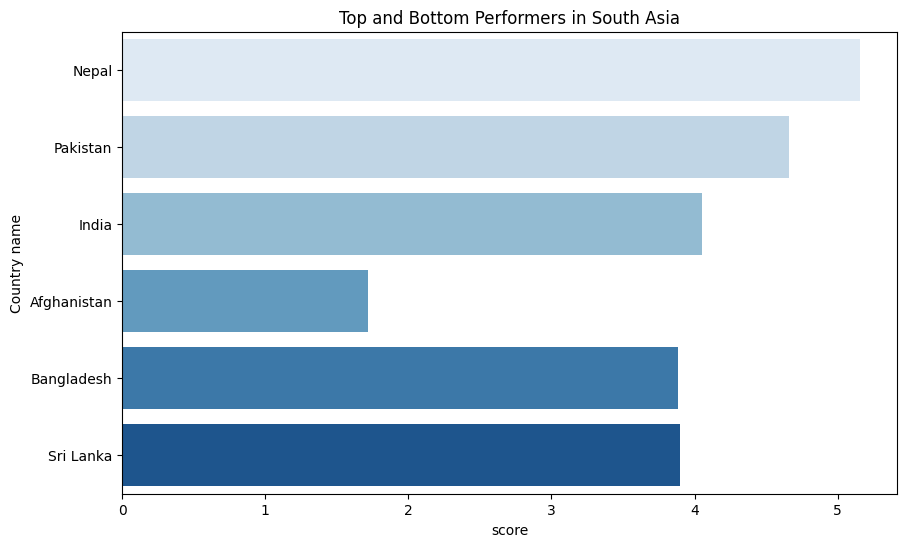

<ipython-input-34-30f8e3a2b1e2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=pd.concat([top_3_me, bottom_3_me]), palette='Reds')


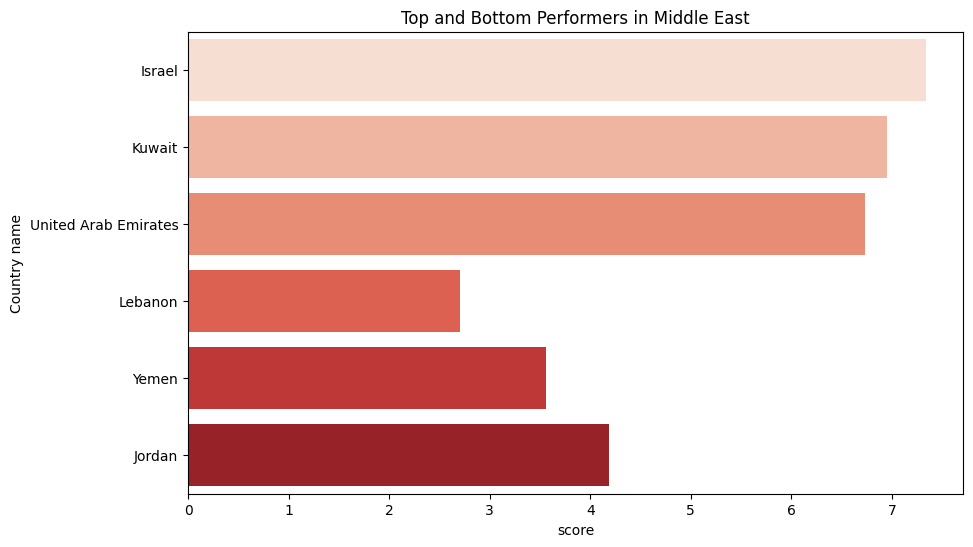

In [ ]:
# Task 2: Top and Bottom Performers
# Identify top 3 and bottom 3 countries in each region
top_3_sa = south_asia_data.nlargest(3, 'score')
bottom_3_sa = south_asia_data.nsmallest(3, 'score')

top_3_me = middle_east_data.nlargest(3, 'score')
bottom_3_me = middle_east_data.nsmallest(3, 'score')

# Plot bar charts
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=pd.concat([top_3_sa, bottom_3_sa]), palette='Blues')
plt.title('Top and Bottom Performers in South Asia')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=pd.concat([top_3_me, bottom_3_me]), palette='Reds')
plt.title('Top and Bottom Performers in Middle East')
plt.show()

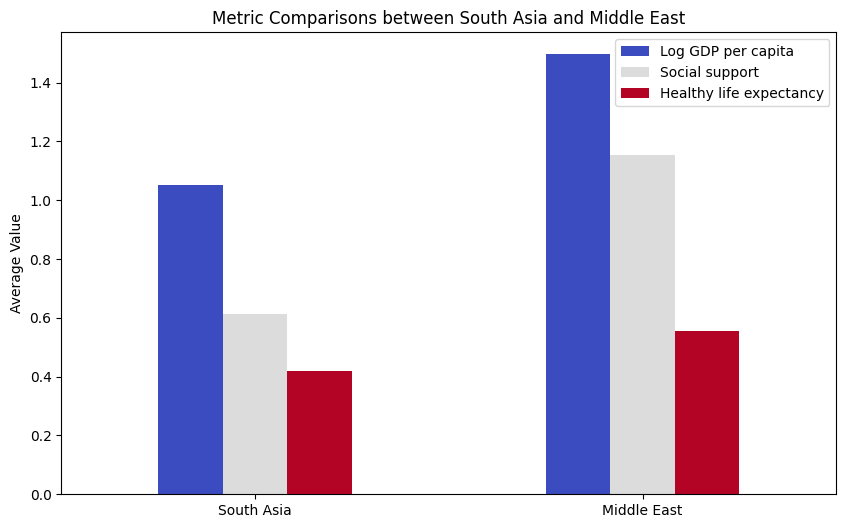

Metric with largest disparity: Social support


In [ ]:

# Task 3: Metric Comparisons
# Metrics to compare
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
means_sa = south_asia_data[metrics].mean()
means_me = middle_east_data[metrics].mean()

# Grouped bar chart
comparison_df = pd.DataFrame({'South Asia': means_sa, 'Middle East': means_me}).T
comparison_df.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title('Metric Comparisons between South Asia and Middle East')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.show()

# Find metric with largest disparity
largest_disparity = (means_sa - means_me).abs().idxmax()
print(f"Metric with largest disparity: {largest_disparity}")

In [ ]:
# Task 4: Happiness Disparity
# Compute range and coefficient of variation (CV)
def compute_disparity(data):
    range_ = data['score'].max() - data['score'].min()
    cv = data['score'].std() / data['score'].mean()
    return range_, cv

range_sa, cv_sa = compute_disparity(south_asia_data)
range_me, cv_me = compute_disparity(middle_east_data)

print(f"\nSouth Asia - Range: {range_sa}, CV: {cv_sa}")
print(f"Middle East - Range: {range_me}, CV: {cv_me}")

# Determine which region has greater variability
greater_variability = "South Asia" if cv_sa > cv_me else "Middle East"
print(f"Region with greater variability: {greater_variability}")


South Asia - Range: 3.4370000000000003, CV: 0.30214828833374263
Middle East - Range: 4.634, CV: 0.28938880812119405
Region with greater variability: South Asia



Correlation Analysis:
South Asia: {'Freedom to make life choices': 0.8005185224163315, 'Generosity': 0.874512371253192}
Middle East: {'Freedom to make life choices': 0.8632202433827543, 'Generosity': 0.6275236536964182}


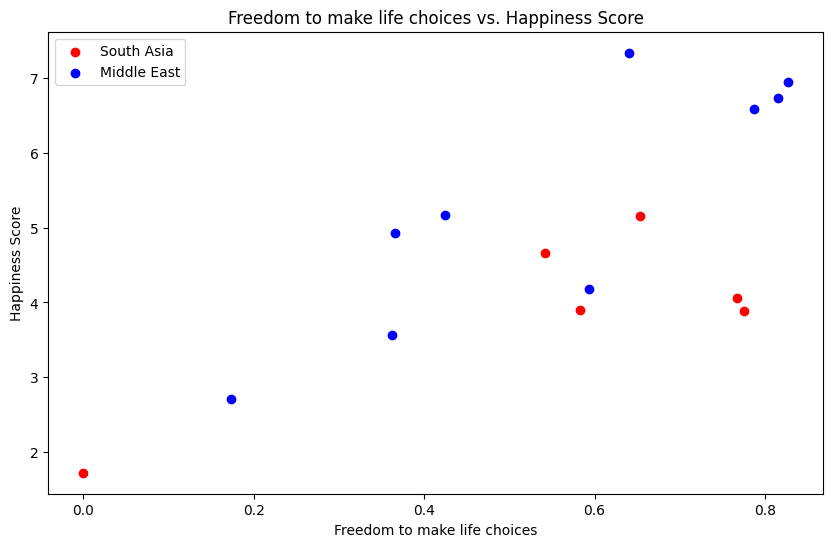

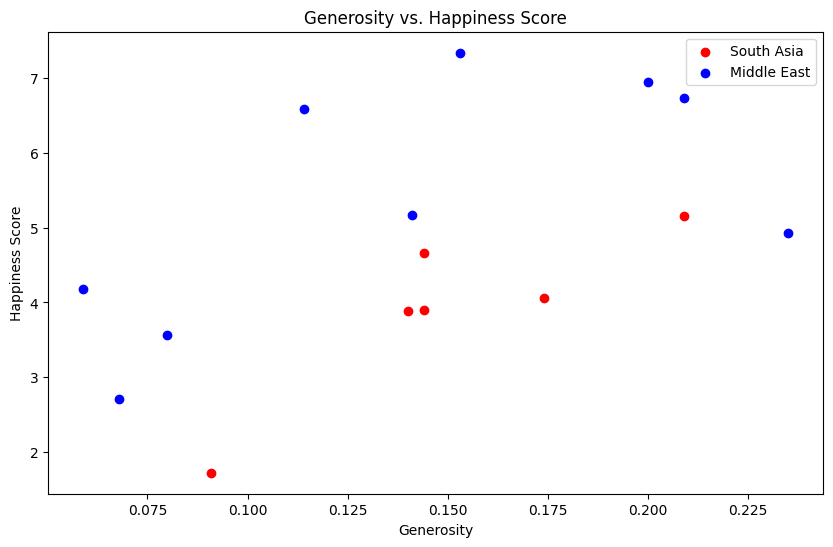

In [ ]:

# Task 5: Correlation Analysis
# Correlation of Score with 'Freedom to Make Life Choices' and 'Generosity'
correlations_sa = {metric: south_asia_data[metric].corr(south_asia_data['score']) for metric in metrics}
correlations_me = {metric: middle_east_data[metric].corr(middle_east_data['score']) for metric in metrics}

print("\nCorrelation Analysis:")
print(f"South Asia: {correlations_sa}")
print(f"Middle East: {correlations_me}")

# Scatter plots with trendlines
for metric in ['Freedom to make life choices', 'Generosity']:
    plt.figure(figsize=(10, 6))
    plt.scatter(south_asia_data[metric], south_asia_data['score'], color='red', label='South Asia')
    plt.scatter(middle_east_data[metric], middle_east_data['score'], color='blue', label='Middle East')
    plt.title(f'{metric} vs. Happiness Score')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.legend()
    plt.show()


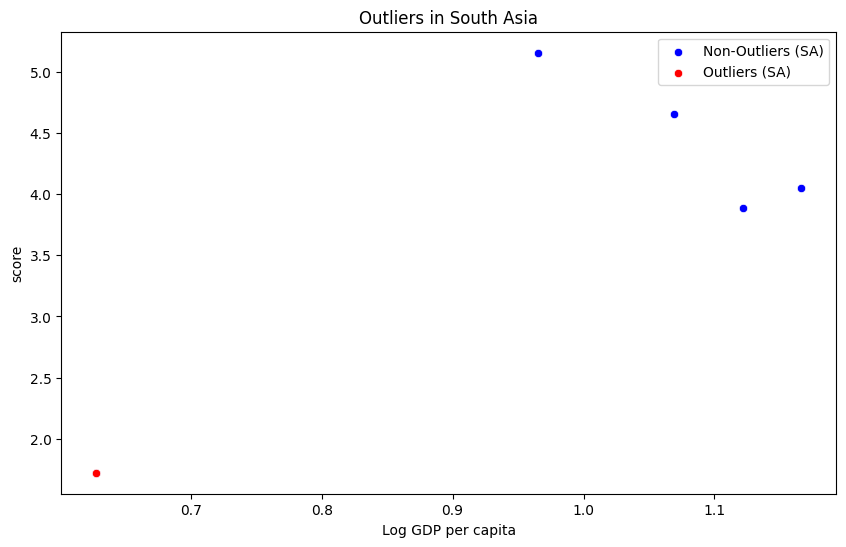

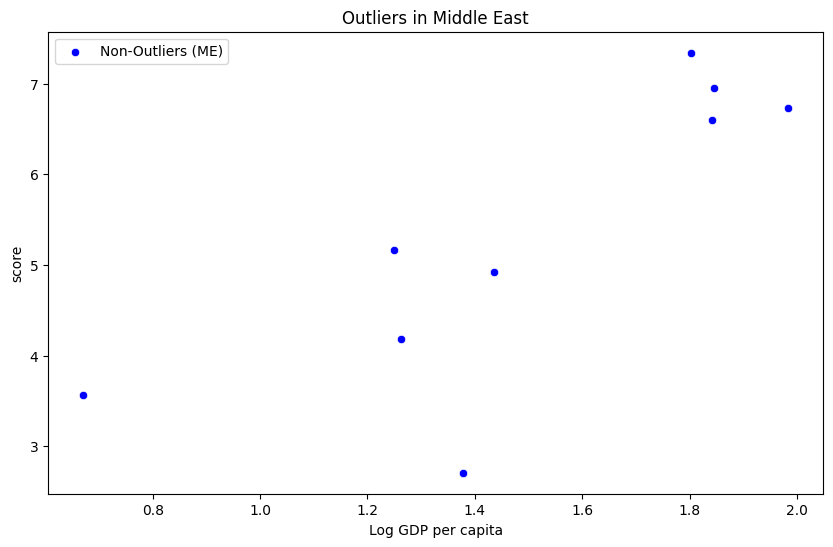

In [ ]:
# Task 6: Outlier Detection
# Detect outliers using IQR method
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)]
    return outliers

outliers_sa = detect_outliers(south_asia_data, 'score')
outliers_me = detect_outliers(middle_east_data, 'score')

# Plot outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, label='Non-Outliers (SA)', color='blue')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_sa, label='Outliers (SA)', color='red')
plt.title('Outliers in South Asia')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_data, label='Non-Outliers (ME)', color='blue')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_me, label='Outliers (ME)', color='red')
plt.title('Outliers in Middle East')
plt.show()

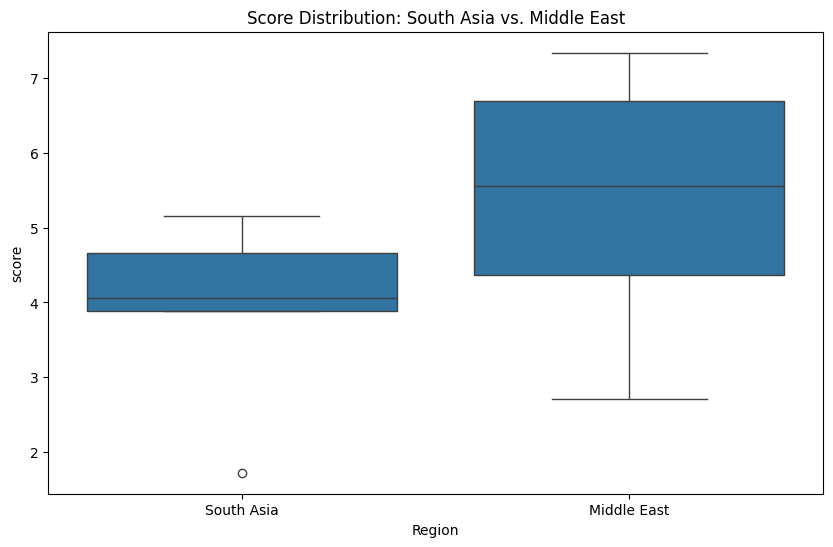

In [ ]:

# Task 7: Boxplots for Score Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([
    south_asia_data.assign(Region='South Asia'),
    middle_east_data.assign(Region='Middle East')
]))
plt.title('Score Distribution: South Asia vs. Middle East')
plt.show()